# Projet MLops - Estimation des prix des biens en Californie

Bienvenue dans notre projet MLops visant à estimer les prix des biens immobiliers en Californie. Nous utilisons une base de données provenant de Kaggle, accessible via le lien suivant : https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features.

Notre objectif principal est d'exploiter des techniques de machine learning pour prédire avec les valeurs des biens en fonction de leurs caractéristiques, fournissant ainsi un outil précieux pour nos opérationnels, qui sont agents immobiliers et possèdent des biens à vendre autour de la Californie.

Nous avons commencé par organiser une réunion avec nos clients, afin de receuillir leurs besoins, et comprendre quel est l'enjeu opérationnel de ce projet. 
Il est important de souligner que le modèle est construit à partir d'une base de données externe, et qu'il sera utilisé pour effectuer de futures estimations sur de nouvelles entrées.

In [1]:
import pandas as pd

In [9]:
data = pd.read_csv('California_Houses.csv')
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [10]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


### Séparation en train et test

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['Median_House_Value'], axis=1)
y = data['Median_House_Value']

In [12]:
X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [13]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: Median_House_Value, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3)

### Jointure des deux jeux d'apprentissages (X_train et y_train)

In [ ]:
data_train = X_train.join(y_train)
data_train.head()

### Etude de la corrélation entre les variables explicatives et la variable à expliquer

In [17]:
tab_correlations = data_train.corr()

<Axes: >

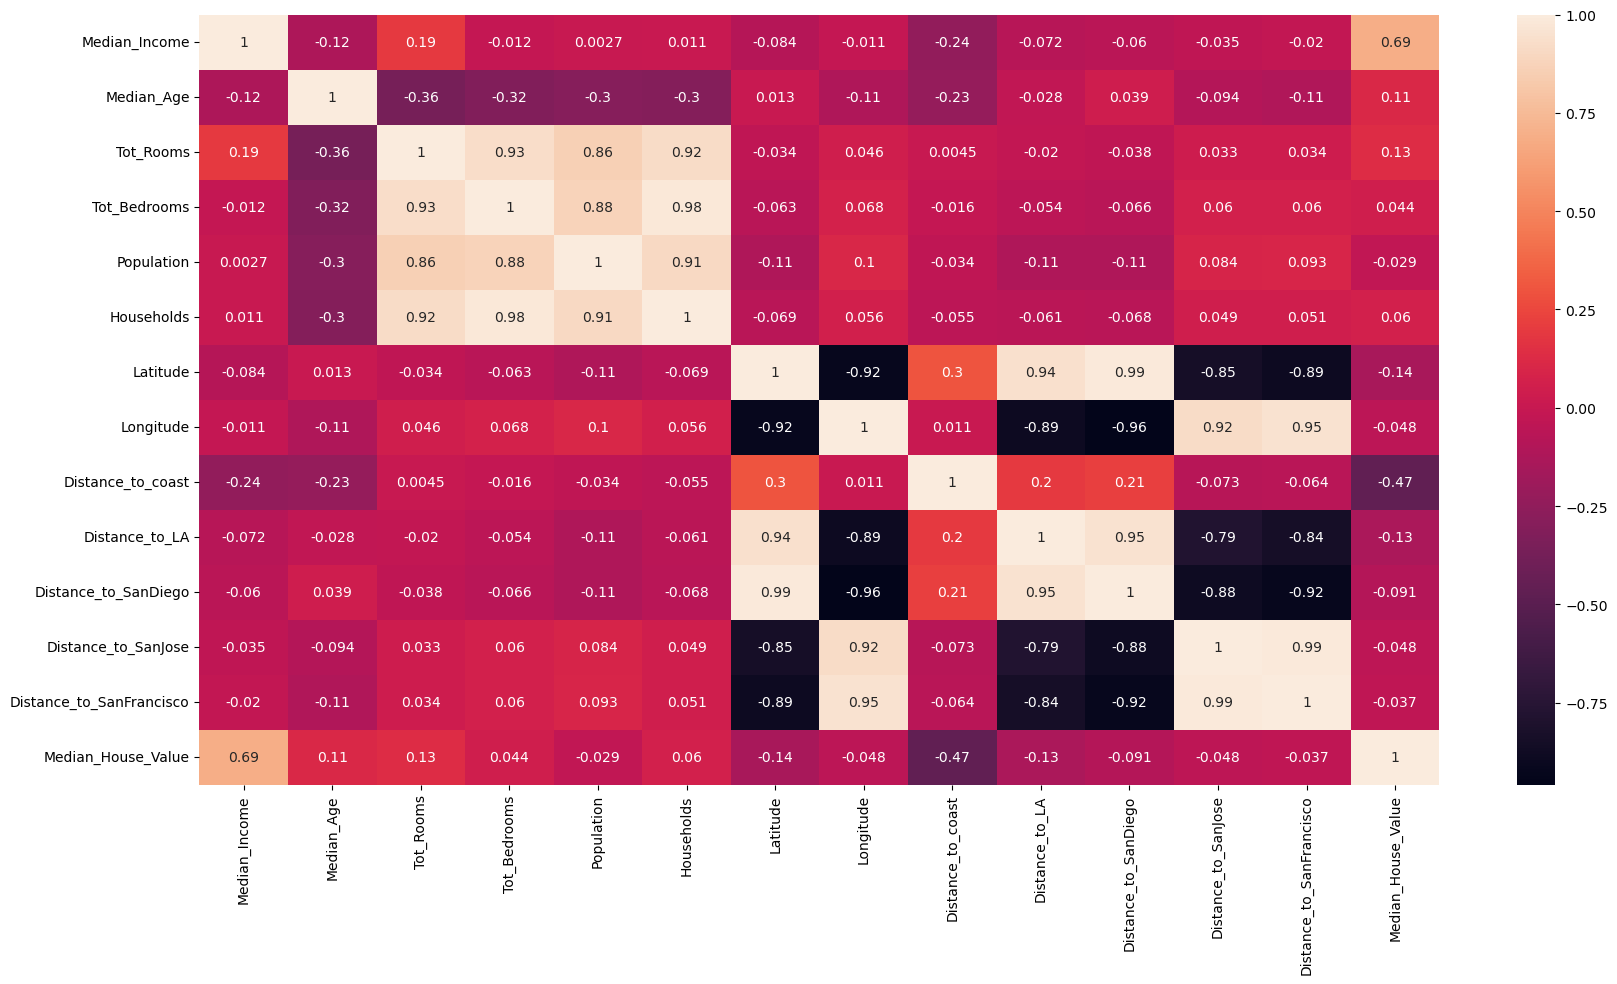

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(tab_correlations, annot=True)

## Tests et sélection de modèles

### Le modèle de régression linéaire

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
reg = LinearRegression().fit(X_train, y_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
reg.score(X_test, y_test)

0.6532253969880168

### Le modèle Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
forest.score(X_test, y_test)

0.8224362255709257